# Assignment 5

## Using Dataset 5

In [86]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import numpy as np
import matplotlib.pyplot as plt
from random import sample, seed
import seaborn as sns
import itertools
import os
import math
from collections import defaultdict
from sklearn.cluster import KMeans

In [6]:
facebook_edges_filepath = "/Users/michaelmbajwa/Desktop/Semester3/ComplexNetworks/Complex-Networks_exercise-main/Datasets/Group5/Facebook-Ego/686.edges"
twitter_edges_filepath = "/Users/michaelmbajwa/Desktop/Semester3/ComplexNetworks/Complex-Networks_exercise-main/Datasets/Group5/Twitter-Ego/1435461.edges"

In [7]:
# Load the /.edges files
# Facebook is an undirected network
graphFacebook = nx.read_edgelist(facebook_edges_filepath, create_using=nx.Graph())

# Twitter is a directed network
graphTwitter = nx.read_edgelist(twitter_edges_filepath, create_using=nx.DiGraph())

In [9]:
# Basic attributes check
print("Number of nodes = {}, edges = {} in facebook graph.".format(graphFacebook.number_of_nodes(), graphFacebook.number_of_edges()))
print("Number of nodes = {}, edges = {} in Twitter graph.".format(graphTwitter.number_of_nodes(), graphTwitter.number_of_edges()))

Number of nodes = 168, edges = 1656 in facebook graph.
Number of nodes = 129, edges = 8037 in Twitter graph.


## Question A

### Please choose ten nodes from either dataset, and return a SubGraph View of the subgraphs induced on the chosen ten nodes.

In [27]:
def plot_graph_structure(G, id):
    plt.rcdefaults()
    plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    ax.set_title("{} structure".format(id), 
                     pad=15, color='#333333',weight='bold')
    ax.set_facecolor('white')
    nx.draw_networkx(G, node_size=10, with_labels=False, arrowstyle='-', arrowsize=1, node_color='indigo', edge_color='slategray')
    fig.tight_layout()
    plt.savefig("{}_structure.png".format(id), transparent=False)
    return

/var/folders/kn/w_kcz5bn00d0d1404zh0hz280000gn/T/ipykernel_29377/73487960.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ten_nodes_facebook = sample(graphFacebook.nodes(), 10)


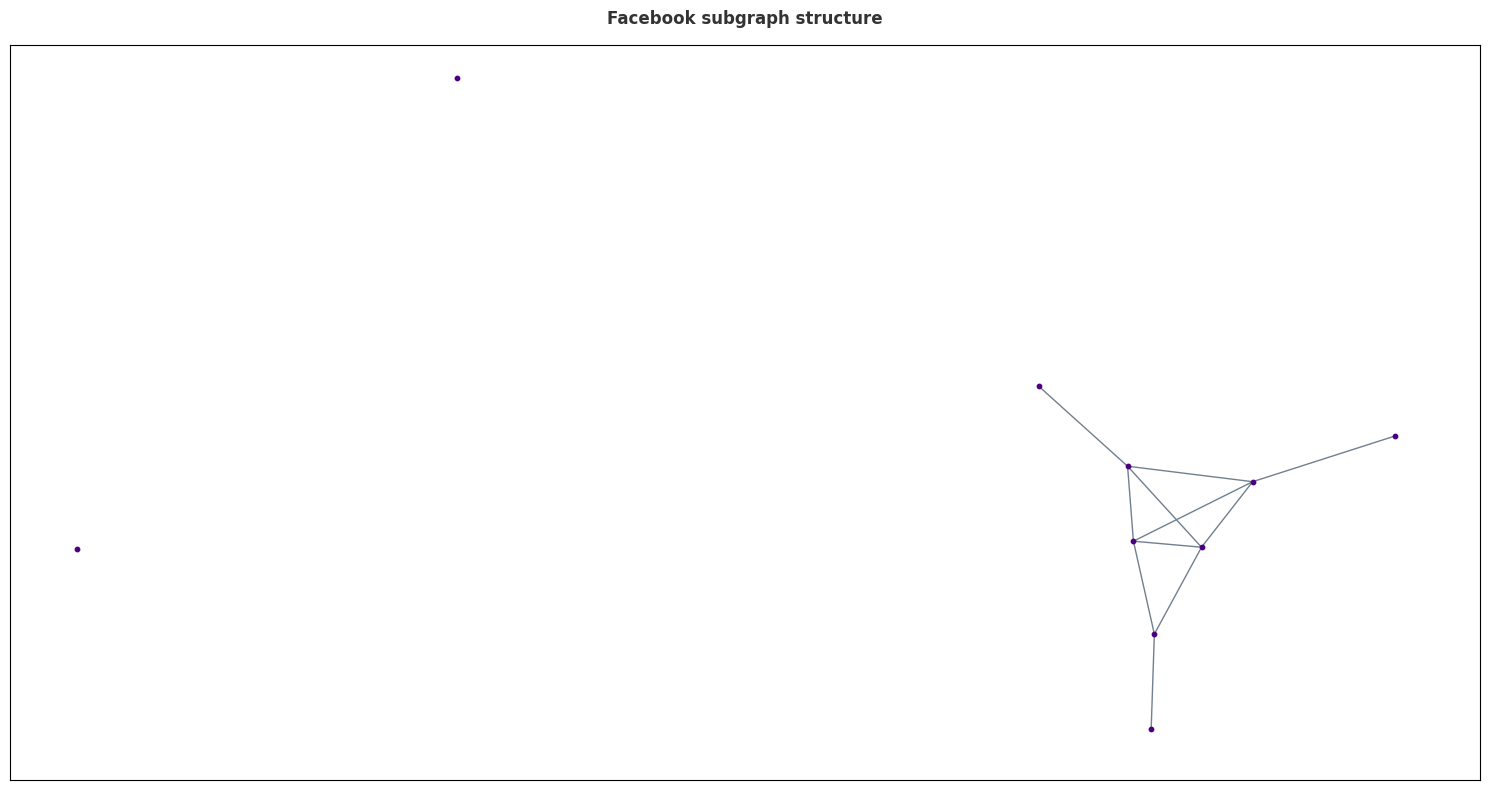

In [31]:
# Get random sample of 10 nodes
seed(560)
ten_nodes_facebook = sample(graphFacebook.nodes(), 10)

# Create the sub graph using the select 10 nodes
subgraphFacebook = graphFacebook.subgraph(ten_nodes_facebook).copy()

# Plot the largest connected component
plot_graph_structure(subgraphFacebook, 'Facebook subgraph')

## Question B

### Please list three algorithms for community detection.

Three algorithms for community detection are;
- Louvain algorithm
- Girvan-Newman algorithm
- Clauset-Newman-Moore community detection algorithm

## Question C

### Please choose one of the datasets, and utilize all of the algorithms listed in (b) to detect communities in the dataset. Please plot graphs to show the communities (mark nodes with different colors / draw communities unions....).

In [163]:
# A function to plot graphs that show communities
def plot_graph_communities(graph, communities, id):
    # Select colors to be used for the grouping
    community_colors = ["red", "orange", "yellow", "lime", 
                    "royalblue", "dodgerblue", "black", "violet"
                    , "deeppink", ""]
    
    # Get positions
    position = nx.spring_layout(graph)
    
    # Select colors to be used
    selected_colors = plt.cm.Dark2(np.linspace(0, 1, len(communities)), )
    plt.rcdefaults()
    plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    ax.set_title("Graph showing {} communities.".format(id), 
                     pad=15, color='#333333',weight='bold')
    ax.set_facecolor('white')
    
    i = 1
    for nodes, group_color in zip(communities, selected_colors):
        nx.draw_networkx_nodes(G=graph, pos=position, nodelist=nodes
                               , node_color=[group_color], node_size=13, label="Community {}".format(i))
        i += 1
    nx.draw_networkx_edges(graph, pos=position, edge_color="lightgray", arrowstyle='-', arrowsize=1)
    
    fig.tight_layout()
    plt.legend()
    plt.savefig("{}_communities.png".format(id), transparent=False)
    return

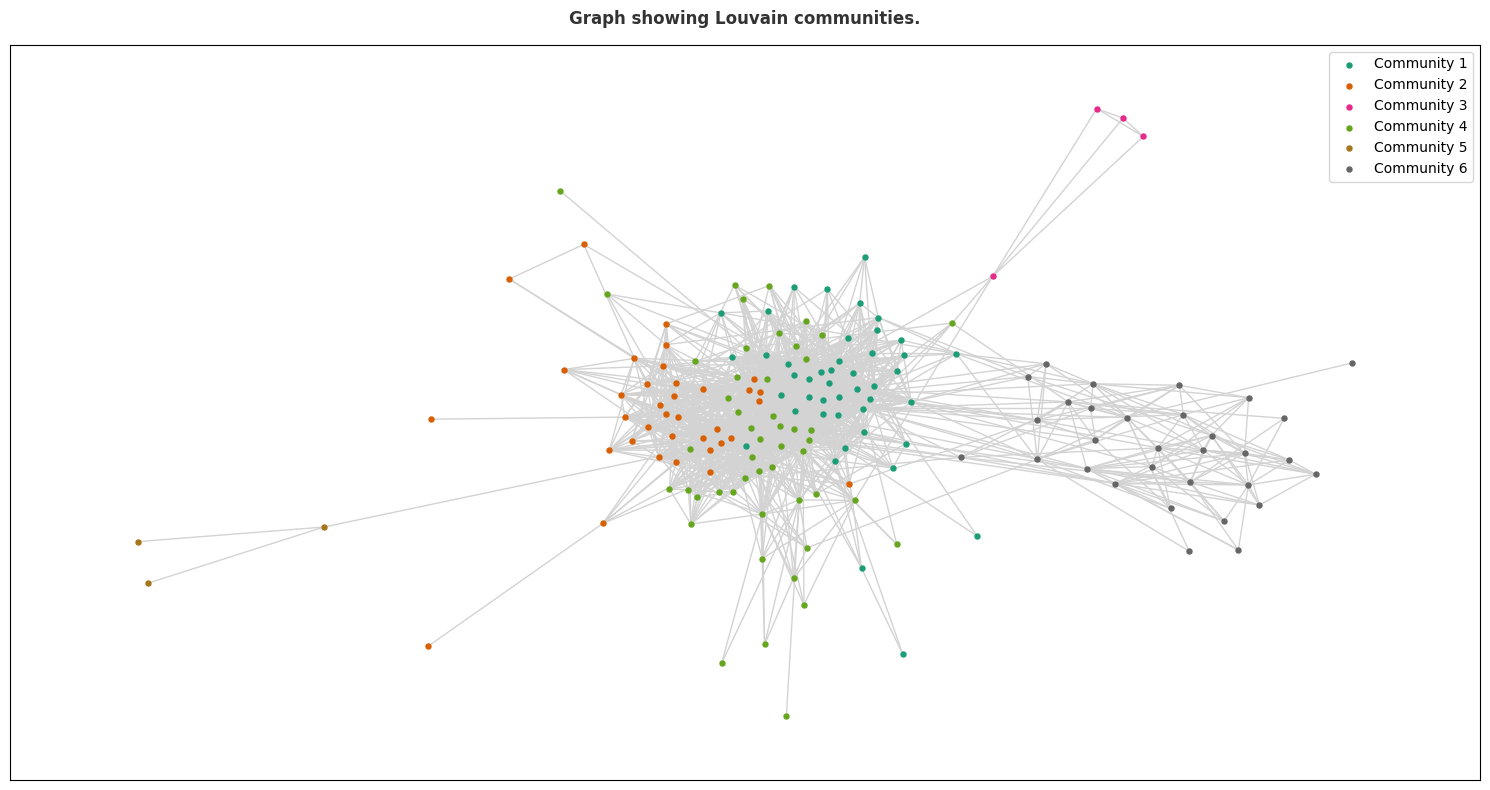

In [164]:
# Louvain algorithm for the Facebook Network
louvain_communities = nx_comm.louvain_communities(graphFacebook, seed=12345)
plot_graph_communities(graphFacebook, louvain_communities, "Louvain")

In [104]:
# Girvan Newman algorithm for Facebook Network
girvan_newman_communities_gen = nx_comm.girvan_newman(graphFacebook)

# Now I will cut the dendrogram produced by the girvan_newmann algorithm at the best level modularity
modularities = []
best_modularity = -1
best_level = None

for community in girvan_newman_communities_gen:
    modularity = nx_comm.modularity(graphFacebook, community)
    modularities.append(modularity)
    if modularity > best_modularity:
        best_modularity = modularity
        best_level = community
    else:
        pass


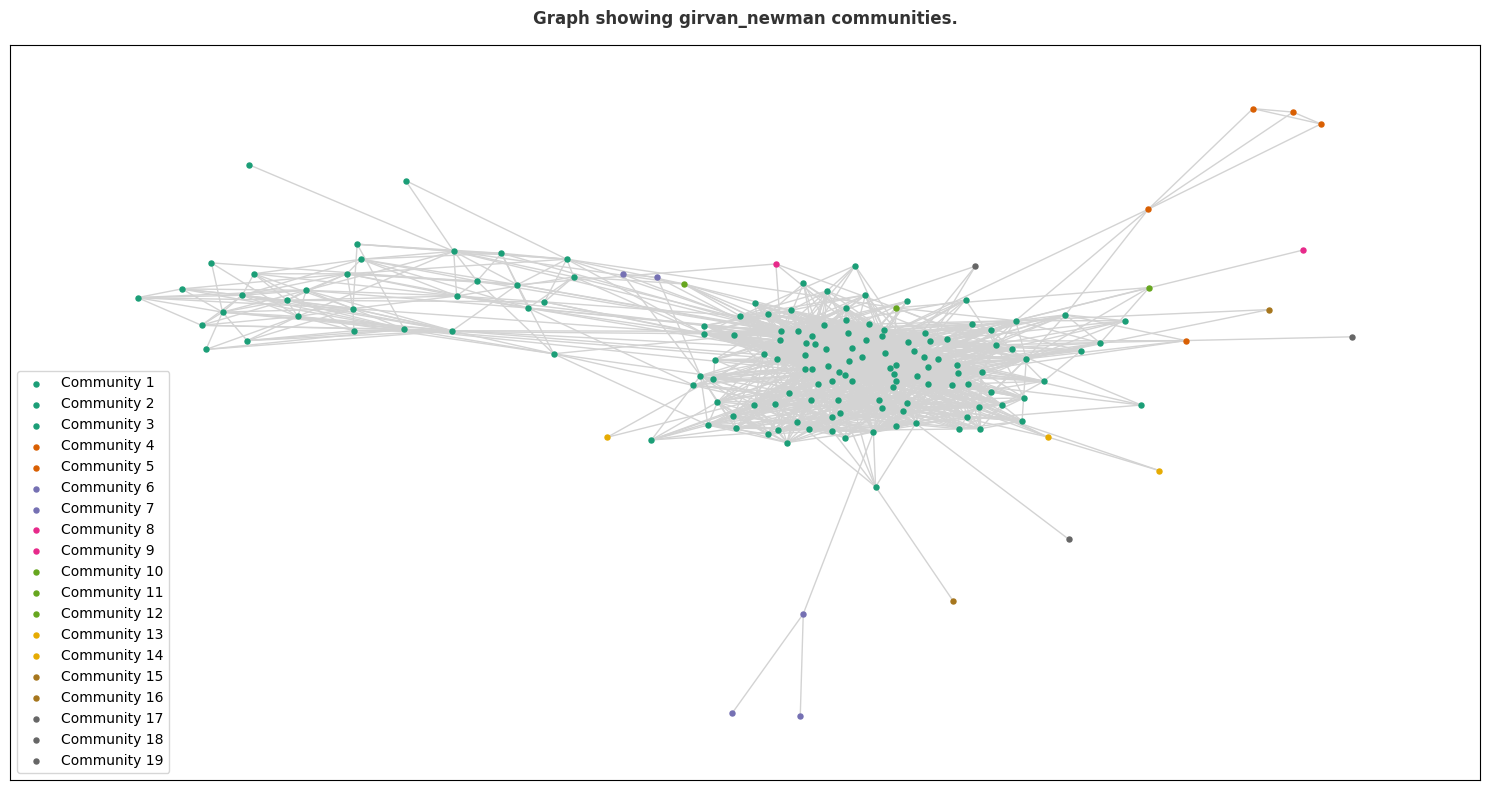

In [166]:
# Now that I have gotten the highest modularity and the resulting community, I will plot it
plot_graph_communities(graphFacebook, best_level, "girvan_newman")

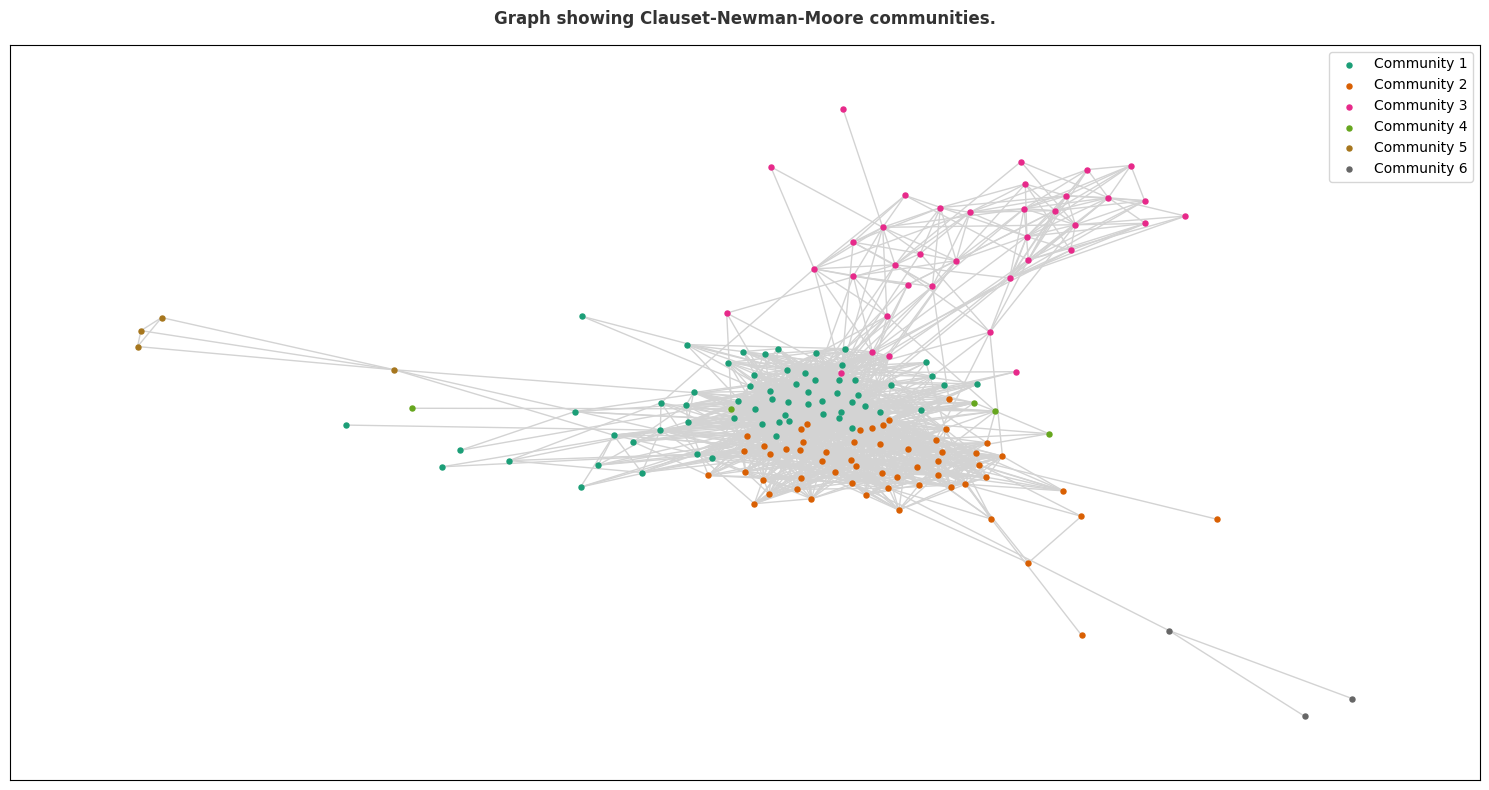

In [193]:
# Clauset-Newman-Moore community detection algorithm for Facebook Network
CNM_communities = nx_comm.greedy_modularity_communities(G=graphFacebook)
plot_graph_communities(graphFacebook, CNM_communities, "Clauset-Newman-Moore")